## Load Application Event Log

In [4]:
from pm4py.objects.log.importer.xes import importer as xes_importer

log = xes_importer.apply("data/BPI Challenge 2018.xes")

In [5]:
# print(log[0]) #prints the first trace of the log
print(log[0][0]) #prints the first event of the first trace

{'success': True, 'org:resource': '0;n/a', 'docid_uuid': 'CD3DC291-76C6-420A-B3F1-7C808970915B', 'doctype': 'Payment application', 'subprocess': 'Application', 'docid': '-18008611495569447', 'activity': 'mail income', 'note': 'none', 'eventid': 'null', 'identity:id': '510B5333-731A-40FD-B7D6-FC149E50E961', 'concept:name': 'mail income', 'lifecycle:transition': 'complete', 'time:timestamp': datetime.datetime(2015, 5, 8, 0, 0, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200)))}


In [69]:
from pm4py.algo.filtering.log.attributes import attributes_filter
subprocesses = attributes_filter.get_attribute_values(log, "subprocess")

print('TYPES OF SUBPROCESSES: \n')
[print(subprocess) for subprocess in subprocesses.keys()]


tracefilter_log_change = attributes_filter.apply(log, ["Change"],
                                          parameters={attributes_filter.Parameters.ATTRIBUTE_KEY: "subprocess", attributes_filter.Parameters.POSITIVE: True})

print('\n NUMBER OF CHANGE {}'.format(len(tracefilter_log_change)))

tracefilter_log_objection = attributes_filter.apply(log, ["Objection"],
                                          parameters={attributes_filter.Parameters.ATTRIBUTE_KEY: "subprocess", attributes_filter.Parameters.POSITIVE: True})

print('NUMBER OF OBJECTION {}'.format(len(tracefilter_log_objection)))

for event in tracefilter_log_objection:
    if event not in tracefilter_log_change:
        tracefilter_log_change.append(event)
        
print('NUMBER OF JOINED {}'.format(len(tracefilter_log_change)))        

TYPES OF SUBPROCESSES: 

Application
Main
Change
Remote
On-Site
Objection
Declared
Reported

 NUMBER OF CHANGE 4740
NUMBER OF OBJECTION 870
NUMBER OF JOINED 4978


## Filter on start & end activity

In [17]:
from pm4py.algo.filtering.log.timestamp import timestamp_filter


filtered_log_events_year1 = timestamp_filter.apply_events(log, "2014-01-01 00:00:00", "2015-01-01 00:00:00")
filtered_log_events_year2 = timestamp_filter.apply_events(log, "2015-01-01 00:00:00", "2016-01-01 00:00:00")
filtered_log_events_year3 = timestamp_filter.apply_events(log, "2016-01-01 00:00:00", "2017-01-01 00:00:00")


KeyboardInterrupt: 

In [23]:
filtered_log_events_year4 = timestamp_filter.apply_events(log, "2017-01-01 00:00:00", "2018-01-01 00:00:00")

In [22]:
len(filtered_log_events_year3)

29300

In [35]:
from pm4py.algo.filtering.log.start_activities import start_activities_filter
from pm4py.algo.filtering.log.end_activities import end_activities_filter

start_targets = ["mail income"]
end_targets = ["finish payment", "save"]

log_start = start_activities_filter.get_start_activities(log)
filtered_log = start_activities_filter.apply(log, start_targets) #suppose "S1" is the start activity you want to filter on

end_activities = end_activities_filter.get_end_activities(log)
filtered_log = end_activities_filter.apply(filtered_log, end_targets)



In [15]:
len(log)

43809

In [16]:
len(filtered_log)

38623

## Export Filtered log

In [43]:
from pm4py.objects.log.exporter.xes import exporter as xes_exporter
xes_exporter.apply(filtered_log, 'filtered_mail-income_finish-payment-save.xes')

In [44]:
import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter
dataframe = log_converter.apply(filtered_log, variant=log_converter.Variants.TO_DATA_FRAME)
dataframe.to_csv('filtered_mail-income_finish-payment-save.csv')

## Discover models

In [38]:
from pm4py import view_petri_net, save_vis_petri_net
from pm4py.objects.petri.exporter import exporter as pnml_exporter

### Alpha Miner

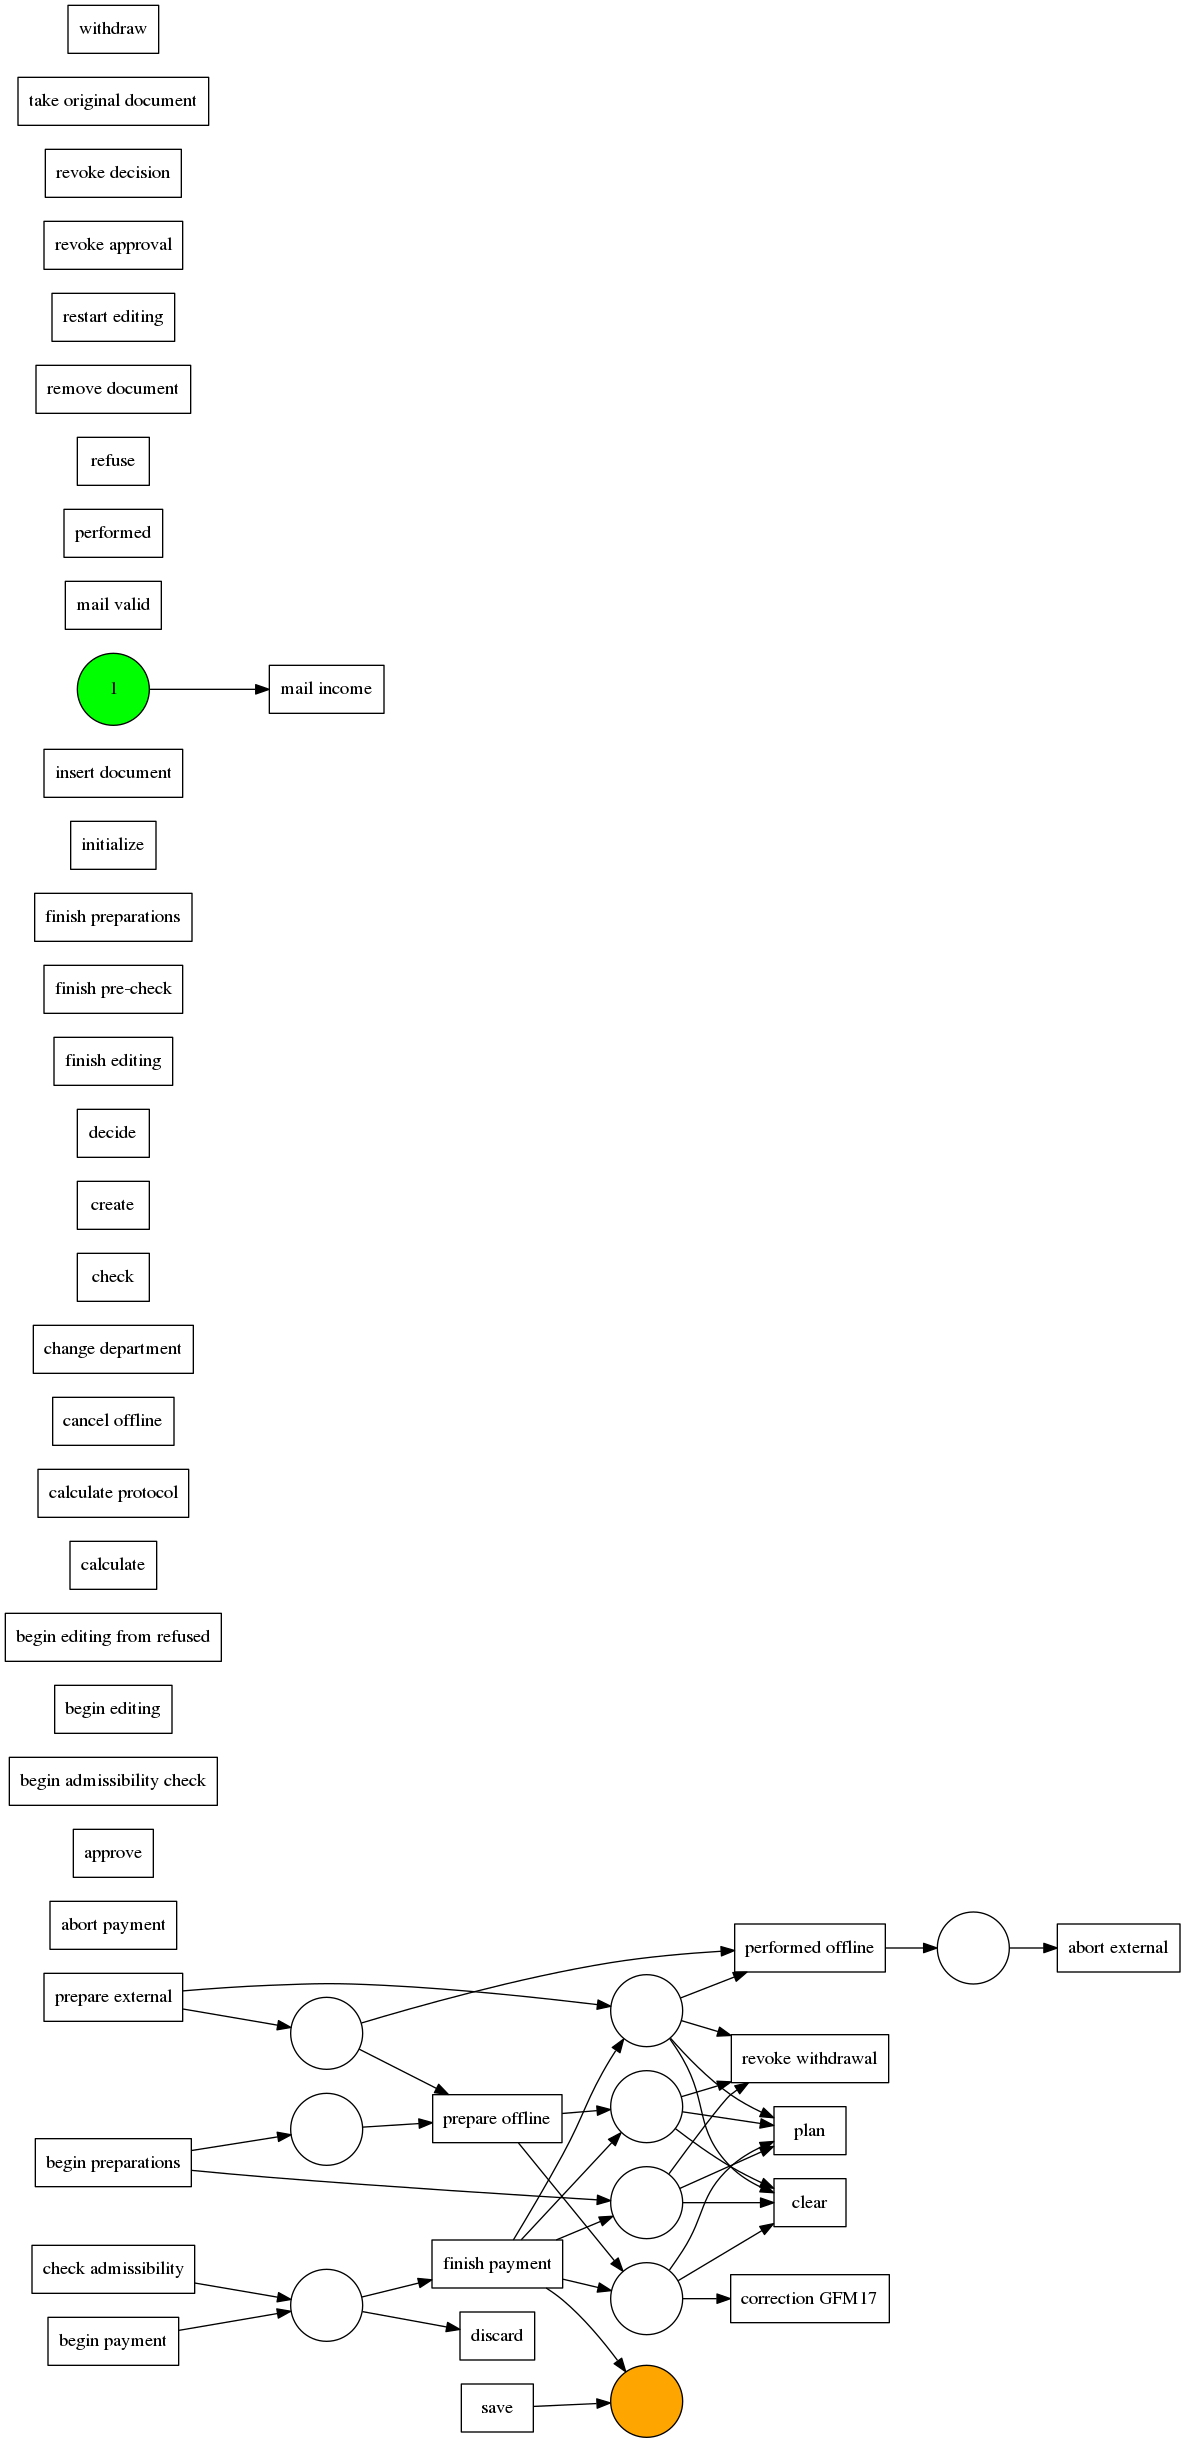

In [40]:
from pm4py.algo.discovery.alpha import algorithm as alpha_miner

net, initial_marking, final_marking = alpha_miner.apply(filtered_log)

pnml_exporter.apply(net, initial_marking, "alpha_miner.pnml", final_marking=final_marking)
view_petri_net(net, initial_marking, final_marking, format='png')

### Inductive miner

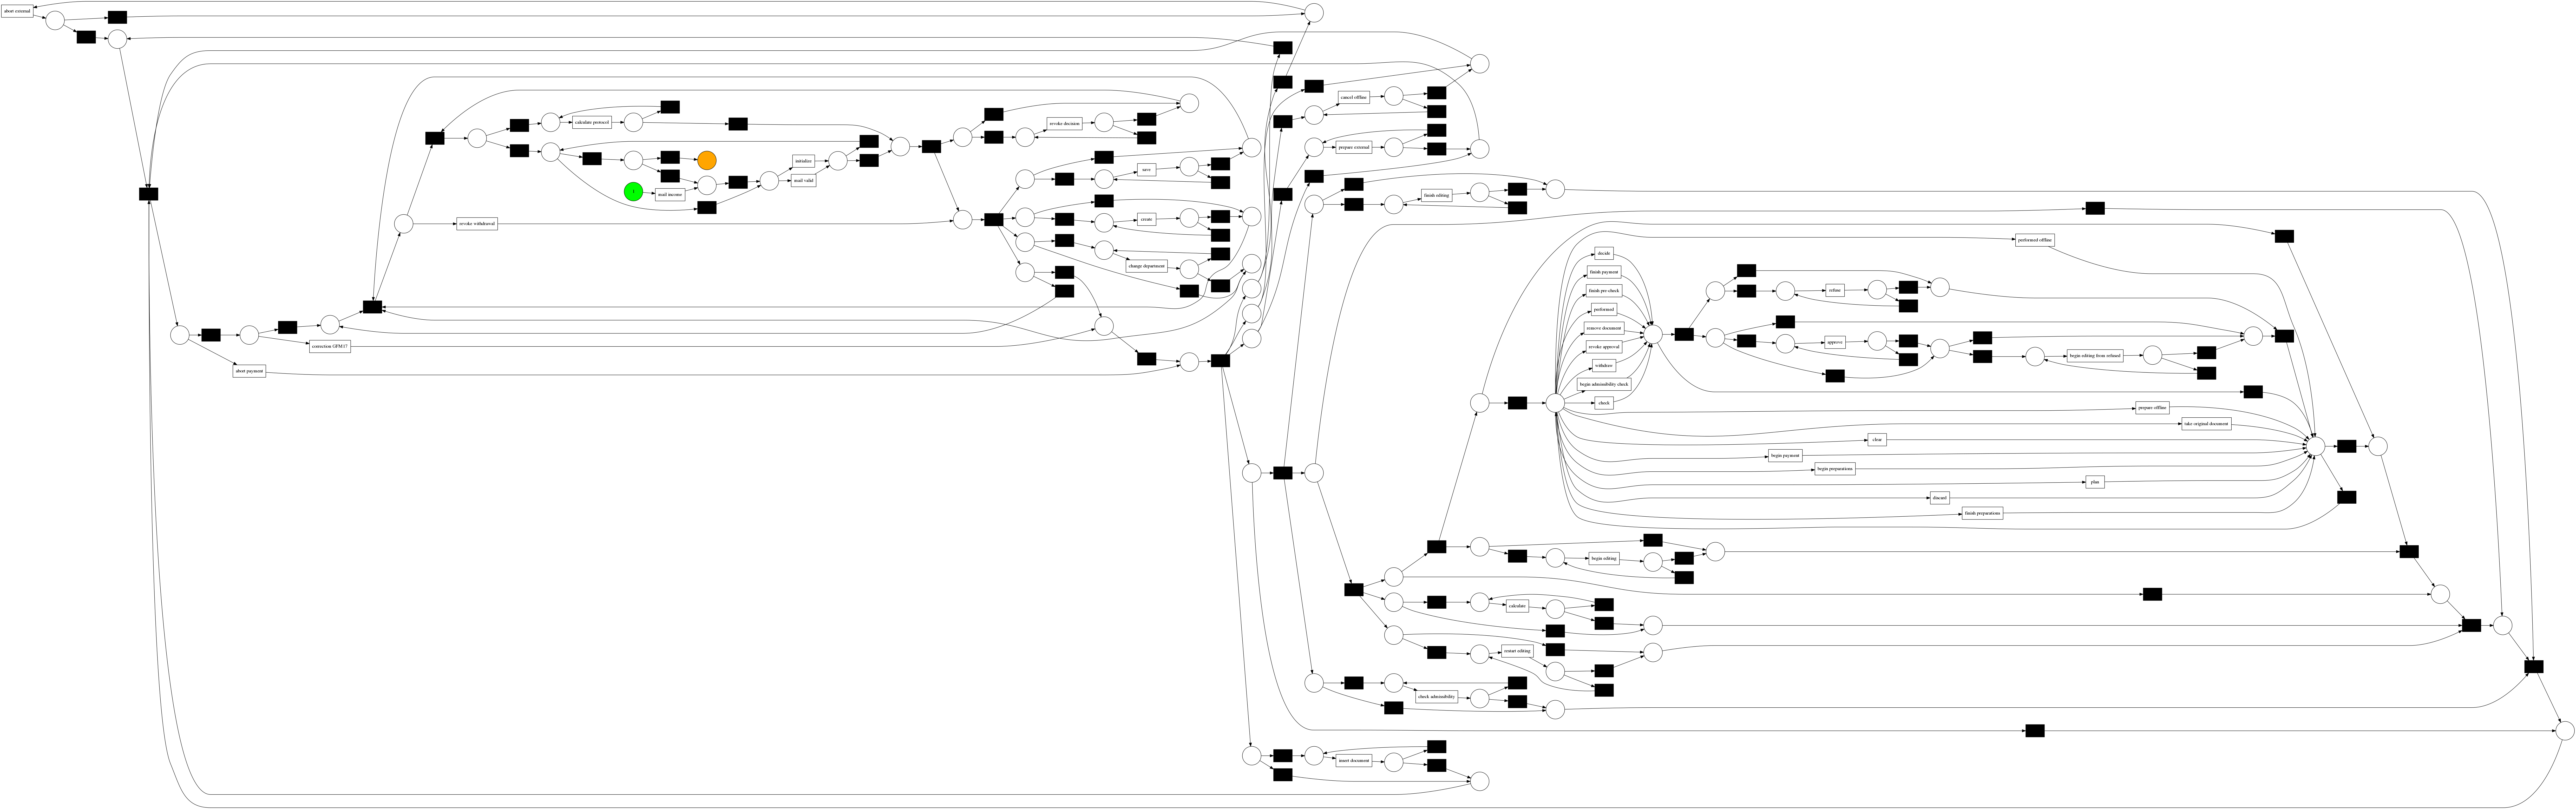

In [41]:
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
net, initial_marking, final_marking = inductive_miner.apply(filtered_log)

pnml_exporter.apply(net, initial_marking, "inductive_miner.pnml", final_marking=final_marking)
view_petri_net(net, initial_marking, final_marking, format='png')

### Heuristic miner

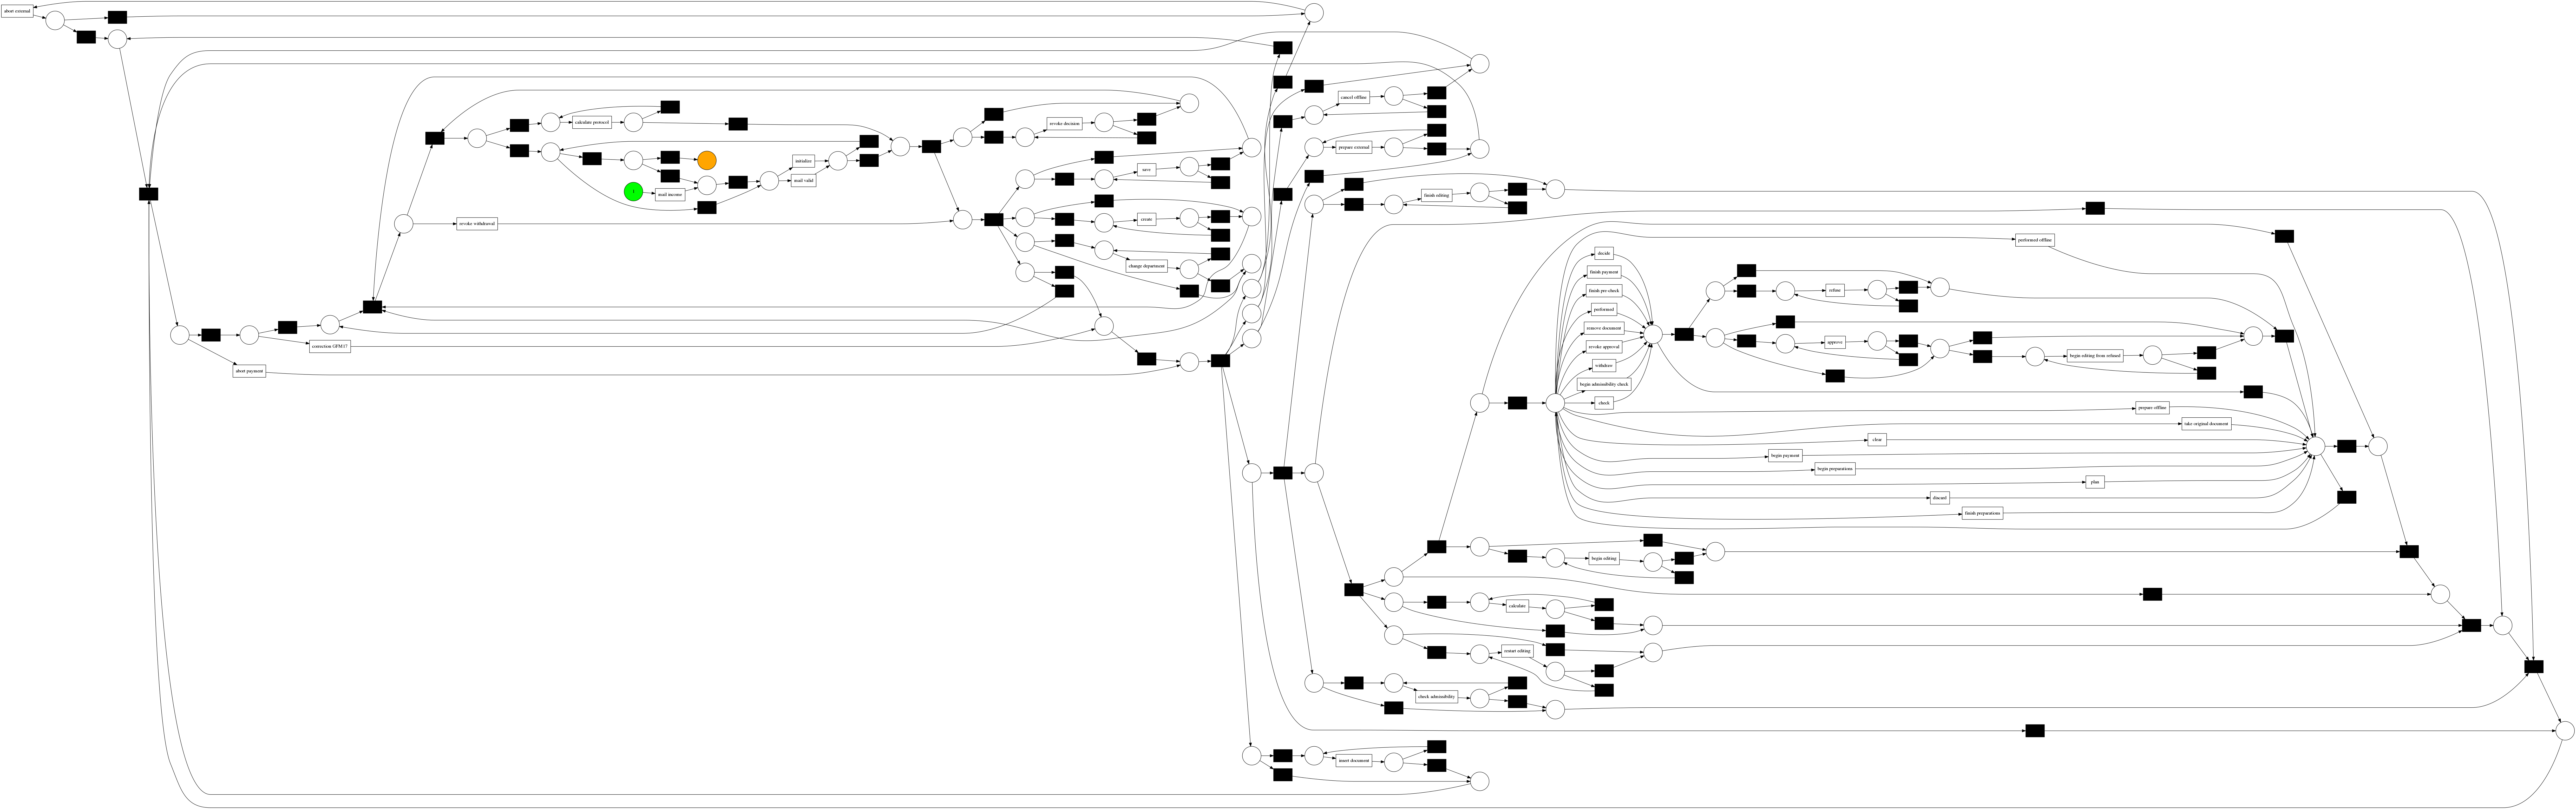

In [42]:
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
heu_net = heuristics_miner.apply_heu(filtered_log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})

pnml_exporter.apply(net, initial_marking, "heuristic_miner.pnml", final_marking=final_marking)
view_petri_net(net, initial_marking, final_marking, format='png')